##버뮤다옵션
버뮤다 옵션(Bermudan Option)은 유럽형 옵션과 미국형 옵션의 혼합 형태로, 옵션 만기 이전에 미리 정해진 특정 날짜에만 조기 행사가 가능한 옵션입니다. 이 옵션은 특정 날짜에만 옵션을 행사할 수 있는 유연성을 제공하여 투자자에게 유리합니다.

[*********************100%%**********************]  1 of 1 completed


Bermudan Call Option Price: 2.50
Bermudan Put Option Price: 22.56


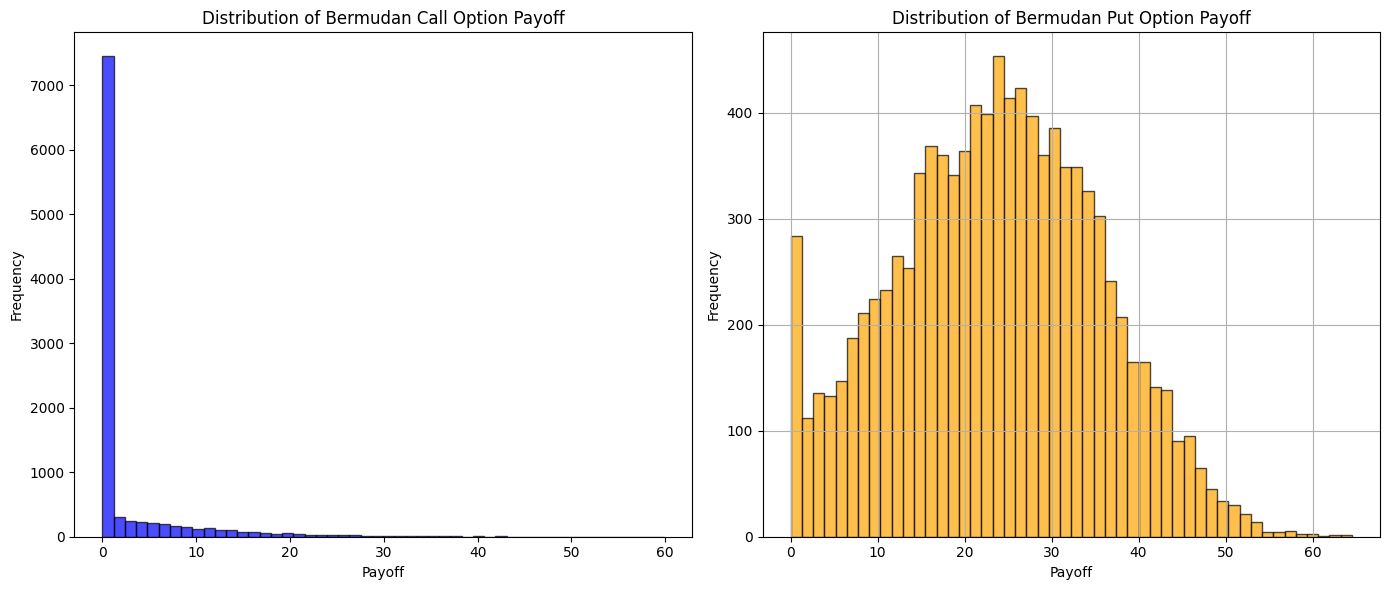

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

def simulate_stock_paths(S0, r, sigma, T, M, I):
    """
    주식 가격 경로 시뮬레이션 함수

    Parameters:
    S0: 초기 주식 가격
    r: 무위험 이자율
    sigma: 변동성
    T: 만기 시간 (단위: 년)
    M: 기간 수 (단위: 일)
    I: 시뮬레이션 수

    Returns:
    주식 가격 경로 배열 (I x M)
    """
    dt = T / M
    paths = np.zeros((I, M + 1))
    paths[:, 0] = S0
    for t in range(1, M + 1):
        z = np.random.standard_normal(I)
        paths[:, t] = paths[:, t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * z)
    return paths

def bermudan_option_payoff(paths, K, exercise_dates, option_type="call"):
    """
    버뮤다 옵션의 페이오프 계산 함수

    Parameters:
    paths: 주식 가격 경로 배열 (I x M)
    K: 행사가격
    exercise_dates: 조기 행사 가능한 날짜 배열
    option_type: "call" 또는 "put"

    Returns:
    버뮤다 옵션의 페이오프 배열
    """
    I, M = paths.shape
    M -= 1  # 첫 번째 열은 초기 가격
    payoff = np.zeros(I)

    if option_type == "call":
        for i in range(I):
            for t in exercise_dates:
                if paths[i, t] > K:
                    payoff[i] = np.maximum(paths[i, t] - K, 0)
                    break
            else:
                payoff[i] = np.maximum(paths[i, -1] - K, 0)
    elif option_type == "put":
        for i in range(I):
            for t in exercise_dates:
                if paths[i, t] < K:
                    payoff[i] = np.maximum(K - paths[i, t], 0)
                    break
            else:
                payoff[i] = np.maximum(K - paths[i, -1], 0)
    else:
        raise ValueError("option_type must be 'call' or 'put'")

    return payoff

# yfinance를 사용하여 데이터 다운로드
ticker = 'AAPL'
data = yf.download(ticker, start="2023-01-01", end="2023-12-31")
closing_prices = data['Close'].values

# 버뮤다 옵션 파라미터 설정
S0 = closing_prices[0]  # 초기 주식 가격
r = 0.05  # 무위험 이자율
sigma = 0.2  # 변동성
T = 1  # 만기 시간 (1년)
M = 252  # 기간 수 (일 단위)
I = 10000  # 시뮬레이션 수
K = 150  # 행사가격
exercise_dates = [63, 126, 189]  # 3개월, 6개월, 9개월 후에 조기 행사 가능

# 주식 가격 경로 시뮬레이션
paths = simulate_stock_paths(S0, r, sigma, T, M, I)

# 버뮤다 옵션 페이오프 계산
bermudan_call_payoffs = bermudan_option_payoff(paths, K, exercise_dates, option_type="call")
bermudan_put_payoffs = bermudan_option_payoff(paths, K, exercise_dates, option_type="put")

# 버뮤다 옵션 가격 계산 (할인된 페이오프 평균)
bermudan_call_price = np.exp(-r * T) * np.mean(bermudan_call_payoffs)
bermudan_put_price = np.exp(-r * T) * np.mean(bermudan_put_payoffs)
print(f"Bermudan Call Option Price: {bermudan_call_price:.2f}")
print(f"Bermudan Put Option Price: {bermudan_put_price:.2f}")

# 시각화
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(bermudan_call_payoffs, bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Bermudan Call Option Payoff')
plt.xlabel('Payoff')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(bermudan_put_payoffs, bins=50, color='orange', edgecolor='black', alpha=0.7)
plt.title('Distribution of Bermudan Put Option Payoff')
plt.xlabel('Payoff')
plt.ylabel('Frequency')

plt.tight_layout()
plt.grid(True)
plt.show()
